# RNN-LSTM Model

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

import mglearn
#import t_Mod
from t_Mod import *

#from t_Mod.plots_t import *

In [2]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR' ]]

display(df.head())
#display(df2.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0.0000,1.0,0.0,0.0000
1,0.9995,0.1798,1.0,0.0,-0.0005
2,0.9985,0.5389,1.0,0.0,-0.0010
3,0.9970,1.0757,1.0,0.0,-0.0015
4,0.9950,1.7884,1.0,0.0,-0.0020


(1.041325, 0.0)

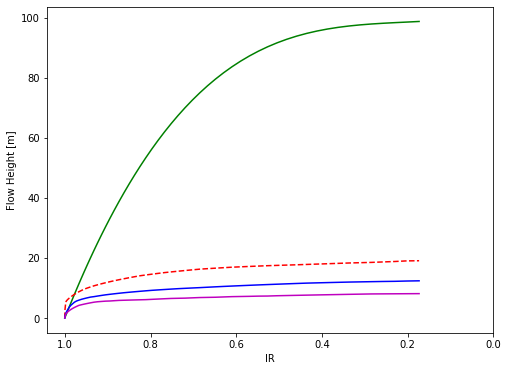

In [3]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


In [4]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

5

In [5]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


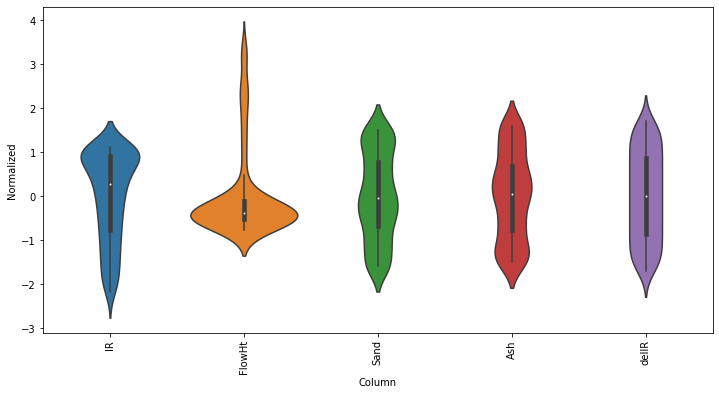

In [6]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()
plt.show()

#### determined not to applied the normalization

In [7]:
# data
df_org = df
#df = df_std_s

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [8]:
df.describe()
#print(df[58:116])

,IR,FlowHt,Sand,Ash,delIR
count,464.000000,464.000000,464.000000,464.000000,464.000000
mean,0.719750,18.216106,0.562500,0.437500,-0.014250
std,0.250962,23.804094,0.292666,0.292666,0.008379
min,0.173500,0.000000,0.100000,0.000000,-0.028500
25%,0.527000,5.900000,0.362500,0.212500,-0.021500
50%,0.789750,8.882400,0.550000,0.450000,-0.014250
75%,0.947500,15.364700,0.787500,0.637500,-0.007000
max,1.000000,98.685300,1.000000,0.900000,0.000000


Text(0, 0.5, 'Flow Height [m]')

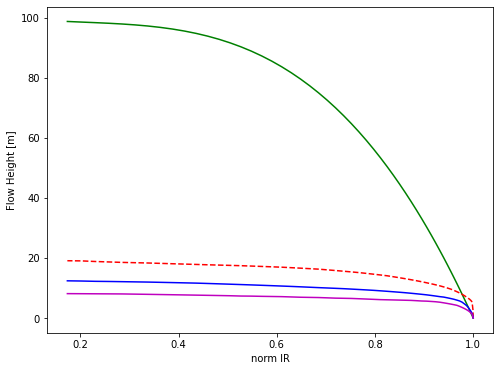

In [9]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('norm IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
#plt.xlim([plt.xlim()[1], -2.5])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])


## for publish

#  curve_0

In [10]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)
#m1 = int(n*0.2)
m1 = int(len(curve_0))
#
m = m1*1.0
train_df_00 = crv_0[0:int(m*0.8)]
val_df_00 = crv_0[int(m*0.8):int(m*1.0)]
test_df_00 = crv_0[int(m*0.8):int(m)]

for i in range(2, 4):
#    m = m1*0.33334*i
    if i == 2 : m = m1*0.9
    if i == 3 : m = m1*1.0
    train_df_0 = crv_0[0:int(m*0.6)]
    val_df_0 = crv_0[int(m*0.6):int(m*0.8)]
    test_df_0 = crv_0[int(m*0.8):int(m)]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
    exec(f'test_df_0{i-1} = test_df_0')


In [11]:
train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
test_total = [test_df_00, test_df_01, test_df_02]

ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


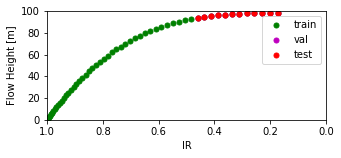

In [12]:
def plot_curve2(trg, valg, teg):
    plt.plot(trg['IR'], trg['FlowHt'], 'go', label='train', markersize=5, zorder=1)
    plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='val',  markersize=5, zorder=1)
    plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='test',  markersize=5, zorder=1)
    plt.xlabel('IR')
    plt.ylabel('Flow Height [m]')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    plt.xlim(0, 1)
    plt.ylim(0, 100)
    plt.legend(loc='best')
    plt.gca().invert_xaxis()
   # plt.gca().invert_yaxis()
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
        plot_curve2(tr, va, te)
   #     plots_t.plot_curve(tr, va, va)
#        t_Mod.plots_t.plot_curve(tr, va, te)

# curve 1

In [13]:
crv_1 = curve_1.copy()
m1 = int(len(crv_1))
m = m1*1.0
train_df_10 = crv_1[0:int(m*1.0)]
val_df_10 = crv_1[int(m*0.8):int(m*1.0)]
test_df_10 = crv_1[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.6)]
    val_df_1 = crv_1[int(m*0.6):int(m*0.8)]
    test_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')
    exec(f'test_df_1{i-1} = test_df_1')

train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : test_t_1}
ttt_1 = pd.DataFrame(ttt_1)

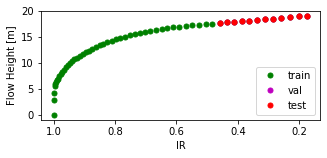

In [14]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

# curve_2

In [15]:
crv_2 = curve_2.copy()
m1 = int(len(crv_2))
m = m1*1.0
train_df_20 = crv_2[0:int(m*0.2)]
val_df_20 = crv_2[int(m*0.2):int(m*0.7)]
test_df_20 = crv_2[int(m*0.7):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.6)]
    val_df_2 = crv_2[int(m*0.6):int(m*0.8)]
    test_df_2 = crv_2[int(m*0.8):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')
    exec(f'test_df_2{i-1} = test_df_2')

train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
test_t_2 = {0: test_df_20 , 1: test_df_21, 2: test_df_22 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : test_t_2}
ttt_2 = pd.DataFrame(ttt_2)

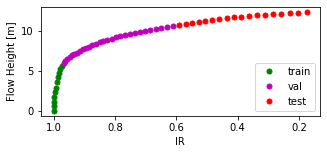

In [16]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)

# curve 3

In [17]:
crv_3 = curve_3.copy()
m1 = int(len(crv_3))
m = m1*1.0
train_df_30 = crv_3[0:int(m*0.8)]
val_df_30 = crv_3[int(m*0.8):int(m*1.0)]
test_df_30 = crv_3[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.6):int(m*0.8)]
    test_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')
    exec(f'test_df_3{i-1} = test_df_3')

train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
test_t_3 = {0: test_df_30 , 1: test_df_31, 2: test_df_32 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : test_t_3}
ttt_3 = pd.DataFrame(ttt_3)

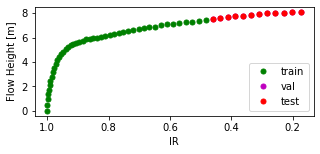

In [18]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(5, 2))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plots_t.plot_curve(tr, va, te)



#### WindowGrerator Class
#### WinGen()

In [19]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [20]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [21]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [22]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [23]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

In [24]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [25]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t



Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [26]:
crv_4 = curve_4.copy()
m = len(crv_4)
train_df_41 = crv_4[116:174]  #10% 90%
train_df_42 = crv_4[0:58]  #40% 60%
train_df_43 = crv_4[58:116]  #60% 40%
train_df_4 = crv_4[174:]  #90% 10%
train_df_45 = crv_4[:]  #all


###  Recurrent Neural Network(RNN)

모든 keras RNN 레이어에 대한 중요한 생성자 인수는 `return_sequences` 인수입니다. 이 설정은 다음 두 가지 방법 중 하나로 레이어를 구성할 수 있습니다.

1. 기본값인 `False`인 경우 레이어는 최종 타임스텝의 출력만 반환하여 단일 예측을 수행하기 전에 모델이 내부 상태를 준비할 시간을 줍니다.

![An lstm warming up and making a single prediction](https://www.tensorflow.org/tutorials/structured_data/images/lstm_1_window.png)

1. `True`이면 레이어가 각 입력에 대한 출력을 반환합니다. 다음과 같은 경우에 유용합니다.

- RNN 레이어 쌓기
- 여러 타임스텝에서 동시에 모델 훈련

![An lstm making a prediction after every timestep](https://www.tensorflow.org/tutorials/structured_data/images/lstm_many_window.png)

`return_sequences=True`이면 모델을 한 번에 24시간 분량 데이터에 대해 훈련할 수 있습니다.

Note: This will give a pessimistic view of the model's performance. On the first timestep the model has no access to previous steps, and so can't do any better than the simple linear and dense models shown earlier.





# functions

In [27]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []


In [28]:
def add_curve1(curve=None, window = None, window_t=None,
              model=None, npat= 2, num_epoch = 20, add_num=0,  df_name=None ) :

    train_loss = []
    val_loss = []
    train_mae = []
    val_mae = []

    #for i in range(0,(3-add_num)) :
    for i in range(0, 3):
        MAX_EPOCHS = num_epoch + 10*i
#        MAX_EPOCHS = 20 + 10*i
        train_df = curve.iloc[i]['tr']
        val_df = curve.iloc[i]['va']
        #val_df = curve.iloc[i]['tr']
        test_df = curve.iloc[i]['te']

        window.train_df = train_df
        window.val_df = val_df
        window.test_df = test_df

       # if i >= add_num :
        if i == add_num :
            hist =  fit_3(model, window, patience= npat, EPOCHS = MAX_EPOCHS )

            train_loss += hist.history['loss'][-1:]
            if 'val_loss' in hist.history:
                print("val_loss not in the list")
                val_loss += hist.history['val_loss'][-1:]

            train_mae += hist.history['mean_absolute_error'][-1:]
            if 'val_mean_absolute_error' in hist.history:
                print("val_mean_absolute_error not in the list")
                val_mae += hist.history['val_mean_absolute_error'][-1:]
            #IPython.display.clear_output()

            eval1(hist)

            window_t.train_df = train_df
            window_t.val_df = val_df
            window_t.test_df = test_df

            #window_t.plot_batch(model, dset_name='train', n_batch=10 )
            plot_xy1(model, window, window_t, n_batch=30)

            subplot_title = (df_name+str(i))
            plt.gca().set_title(subplot_title)

            #plt.text(0.9, 0.1, "subtitle".format(subplot_title))
            #plt.gca().text(0.9, 0.1,  subplot_title)


    #    window_t.plot_batch(model, dset_name='val', n_batch=10, figures=0)

#    window_t.plot_batch(model, dset_name='test', n_batch=10, figures=0)

    train_loss = [x/4 for x in train_loss]
    val_loss = [x/4 for x in val_loss]
    train_mae = [x/4 for x in train_mae]
    val_mae = [x/4 for x in val_mae]

    return train_loss, val_loss, train_mae, val_mae, hist

def fit_3(model, window,   patience=2, EPOCHS=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    history = model.fit(window.train, epochs=EPOCHS,
                      validation_data=window.val, verbose=2
                     , callbacks=[early_stopping])
    return history

def eval1(hist) :
    fig, loss_ax = plt.subplots(figsize =(7,3))

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    if 'val_loss' in hist.history:
        loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist.history:
        acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')


def plot_xy1(model=None, window=None, window_t=None, dset_name=None, plot_col='FlowHt', max_subplots=40,
             n_batch=None, figures=None):
  if dset_name is not None :
      if dset_name == 'train':
            dataset = window_t.train
      elif dset_name == 'val':
            dataset = window_t.val
      elif dset_name == 'test' :
            dataset = window_t.test
#      else :
#            dataset = self.train

  if model is not None :
        fig, ax2 = plt.subplots(figsize =(7,3))
        ax2.margins(0.01)

  fig, ax3 = plt.subplots(figsize =(5,5))
  ax3.margins(0.01)

  markers = ["o", "s", "D", "h"]
  colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

  if dset_name is not None :
      data = [dataset]
  else :
      data = [window_t.train, window_t.val, window_t.test]
  for j, dataset in enumerate(data) :
      for i, batch in enumerate(dataset) :
            inputs, labels, lab = batch
#            nrows = len(inputs)
#            if nrows == 1 :nrows=2
            if  j == 0 and i == 0 :
              x_max_0 = np.array([tf.reduce_max(labels)])
              x_min_0 = np.array([tf.reduce_min(labels)])

            x_max_tmp = np.array([tf.reduce_max(labels)])
            x_min_tmp = np.array([tf.reduce_min(labels)])
            if x_max_0 <= x_max_tmp:
                x_max = x_max_tmp
                x_max_0 = x_max_tmp
            if x_min_0 >= x_min_tmp:
                x_min = x_min_tmp
                x_min_0 = x_min_tmp

            if model is not None:
                predictions = model(inputs)

            #            fvsize = nrows * 1.5
            plot_col_index = window_t.column_indices[plot_col]
            max_n = min(max_subplots, len(inputs))
            ax2.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],label='Inputs', marker='.',
                        color=colors[j],  facecolors='none')

            for n in range(max_n):
                if window_t.label_columns:
                        label_col_index = window_t.label_columns_indices.get(plot_col, None)
                else:
                        label_col_index = plot_col_index
                if label_col_index is None:
                        continue
                if model is not None:
                      ax2.scatter(lab[n, :, 0], predictions[n, :, 0], label='Predictions',
                             marker='*',  facecolors='none',  color = 'y' )
                      ax3.scatter(predictions[n, :, 0], labels[n, :, label_col_index],
                                 color = colors[j],  facecolors='none', marker = '.')

                      l_max = np.array([tf.reduce_max(labels)])
                      p_max = np.array([tf.reduce_max(predictions)])
                      x_max_tmp = max(l_max, p_max)
                      l_min = np.array([tf.reduce_min(labels)])
                      p_min = np.array([tf.reduce_min(predictions)])
                      x_min_tmp = max(l_min, p_min)
                      if x_max_0 < x_max_tmp :
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                      if x_min_0 > x_min_tmp :
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp
            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue
            x_max_0 = x_max.copy()
            x_min_0 = x_min.copy()
  if model is not None:
        y_min = tf.identity(x_min)
        y_max = tf.identity(x_max)
#        ax3.set_xlim(x_min, x_max)
#        ax3.set_ylim(y_min, y_max)
        ax3.plot([x_min, y_max], [x_min, y_max], 'k--') # dashed diagonal
        ax3.set_xlabel('Predicted')
        ax3.set_ylabel('Measured')
  ax2.invert_xaxis()
#  ax4.invert_xaxis()

  return(ax2, ax3)


In [29]:
def eval2(hist) :
    fig, loss_ax = plt.subplots(figsize =(7,3))

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    if 'val_loss' in hist.history:
        loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist.history:
        acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    loss_ax.legend(loc='lower left')
    acc_ax.legend(loc='upper right')
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')

In [30]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(64, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [31]:
_ = compile.compile_2(lstm_model)

In [49]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 64)             17920     
_________________________________________________________________
dense (Dense)                (None, 8, 1)              65        
Total params: 17,985
Trainable params: 17,985
Non-trainable params: 0
_________________________________________________________________


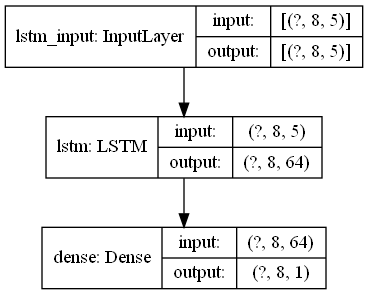

In [50]:
from keras.utils import plot_model
plot_model(lstm_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

In [35]:
print('Input shape:', wide_window.example[0].shape)

print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (16, 8, 5)
Output shape: (16, 8, 1)


## Fitting

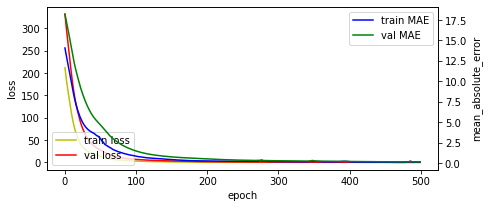

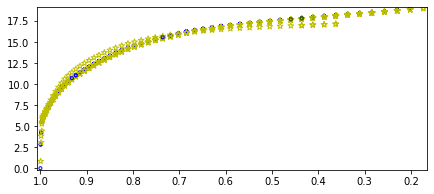

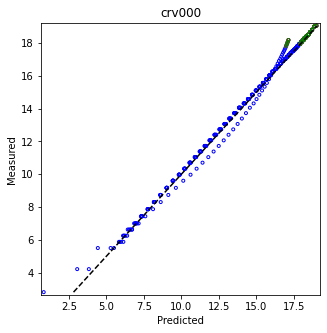

In [36]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con, hist =  \
    add_curve1(curve=ttt_1, window=wide_window,
             window_t=wide_window_t, num_epoch = 500,
                      model=lstm_model,add_num=0, npat= 20, df_name='crv00' )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

IPython.display.clear_output()

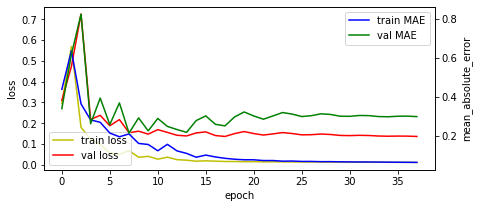

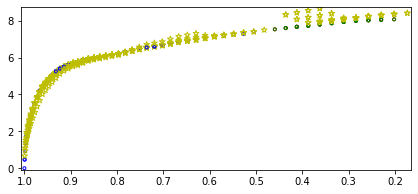

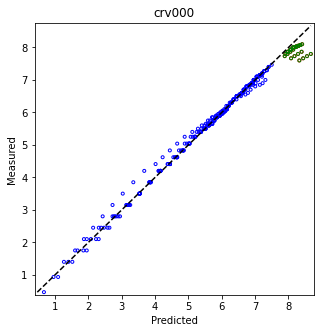

In [37]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con, hist =  \
    add_curve1(curve=ttt_3, window=wide_window,
             window_t=wide_window_t, num_epoch = 100,
                      model=lstm_model,add_num=0, npat= 20, df_name='crv00' )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

IPython.display.clear_output()

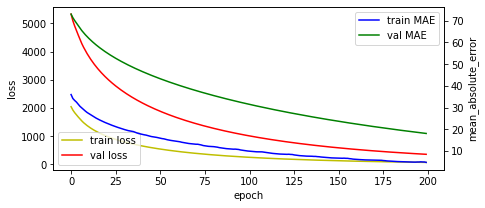

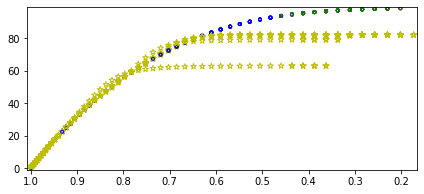

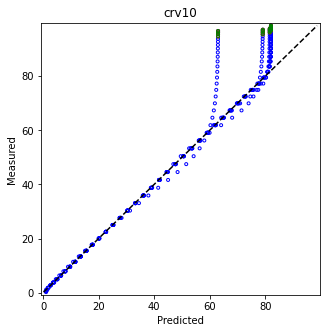

In [38]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con, hist =  \
    add_curve1(curve=ttt, window=wide_window,
             window_t=wide_window_t, num_epoch = 200,
                      model=lstm_model,add_num=0, npat= 20, df_name='crv1' )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

IPython.display.clear_output()


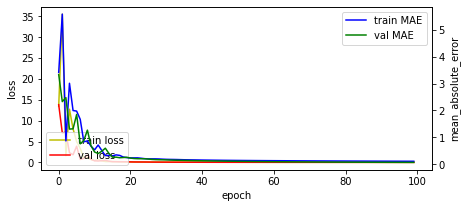

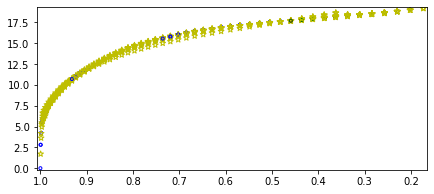

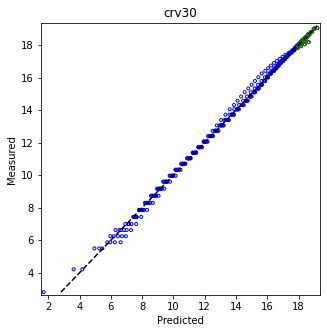

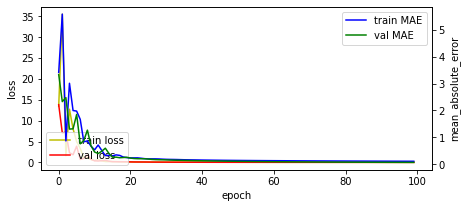

In [39]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con, hist =  \
    add_curve1(curve=ttt_1, window=wide_window,
             window_t=wide_window_t, num_epoch = 100,
                      model=lstm_model,add_num=0, npat= 20, df_name='crv3' )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

IPython.display.clear_output()

eval2(hist)

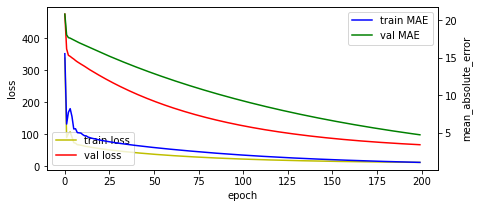

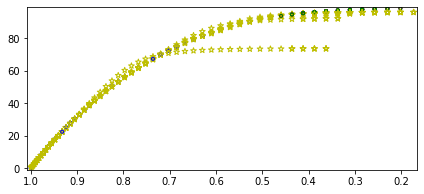

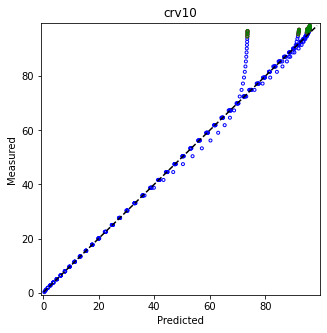

In [40]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con, hist =  \
    add_curve1(curve=ttt, window=wide_window,
             window_t=wide_window_t, num_epoch = 200,
                      model=lstm_model,add_num=0, npat= 20, df_name='crv1' )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

IPython.display.clear_output()


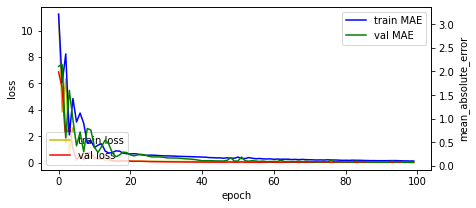

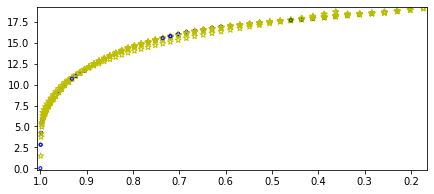

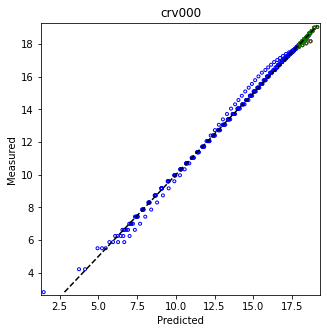

In [41]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con, hist =  \
    add_curve1(curve=ttt_1, window=wide_window,
             window_t=wide_window_t, num_epoch = 100,
                      model=lstm_model,add_num=0, npat= 20, df_name='crv00' )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

IPython.display.clear_output()

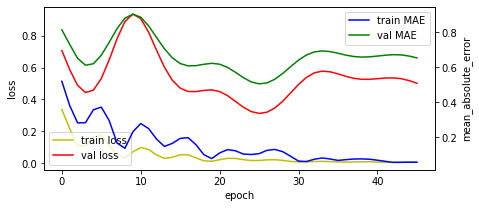

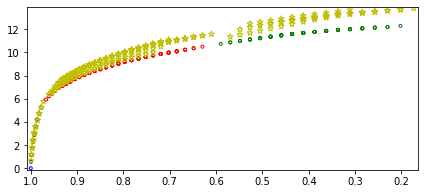

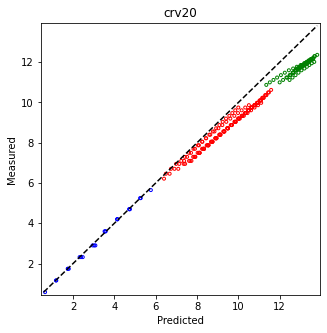

In [42]:
train_loss_con, val_loss_con, train_mae_con, val_mae_con, hist =  \
    add_curve1(curve=ttt_2, window=wide_window,
             window_t=wide_window_t, num_epoch = 100,
                      model=lstm_model,add_num=0, npat= 20, df_name='crv2' )
tr_loss_con = tr_loss_con + train_loss_con
va_loss_con = va_loss_con + val_loss_con
tr_mae_con = tr_mae_con + train_mae_con
va_mae_con = va_mae_con + val_mae_con

IPython.display.clear_output()

## validation


(<AxesSubplot:>, <AxesSubplot:xlabel='Predicted', ylabel='Measured'>)

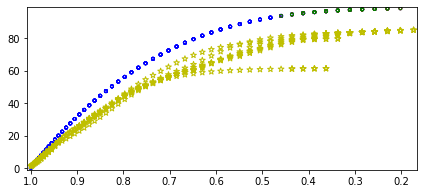

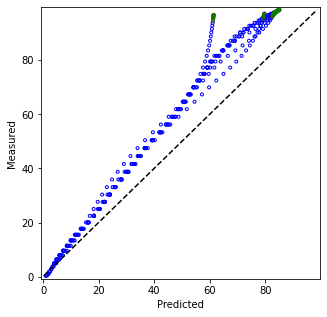

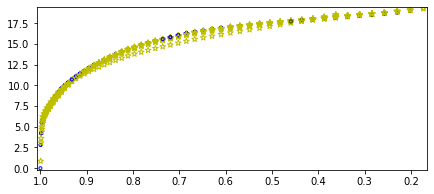

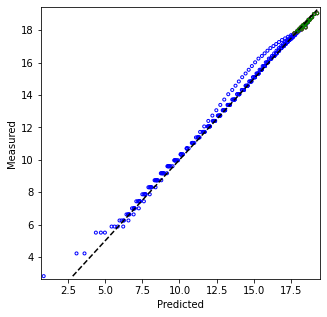

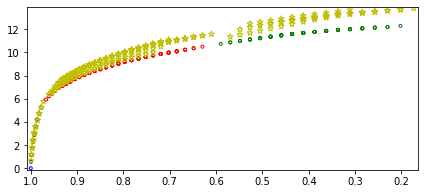

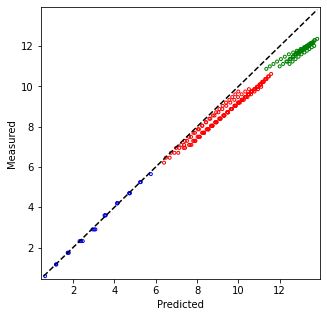

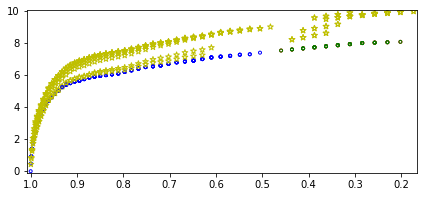

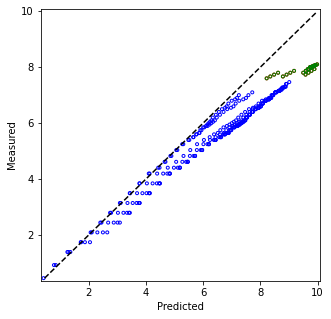

In [43]:
wide_window_t.train_df = train_df_00
wide_window_t.val_df = val_df_00
wide_window_t.test_df = test_df_00
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)

wide_window_t.train_df = train_df_10
wide_window_t.val_df = val_df_10
wide_window_t.test_df = test_df_10
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)

wide_window_t.train_df = train_df_20
wide_window_t.val_df = val_df_20
wide_window_t.test_df = test_df_20
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)

wide_window_t.train_df = train_df_30
wide_window_t.val_df = val_df_30
wide_window_t.test_df = test_df_30
plot_xy1(lstm_model, window_t=wide_window_t,  n_batch=10)

# batch plot

In [44]:
n = len(df)*0.5
#crv_tr = ttt.iloc[2]['tr']
crv_tr = train_df_20
#crv_va = ttt.iloc[2]['va']
crv_va = val_df_20
crv_te = test_df_20

tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []
train_loss = []
val_loss = []
train_mae = []
val_mae = []

npat = 50
n_batch = 30

window = wide_window
window_t = wide_window_t
model = lstm_model

Text(0.5, 1.0, 'val')

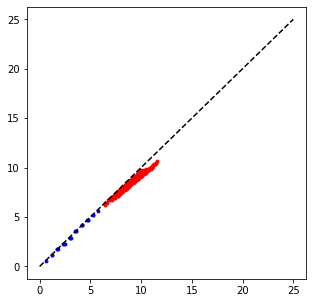

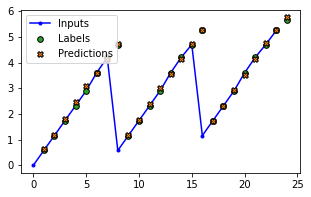

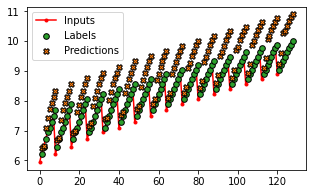

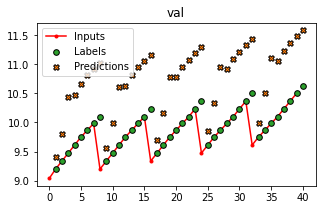

In [45]:
window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(5,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, 0],
                        marker='.',color=colors[j], s=32)

            #if i == 0:
            ax5.legend()

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 25], [0, 25], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('val')
plt.gca().set_title(subplot_title)


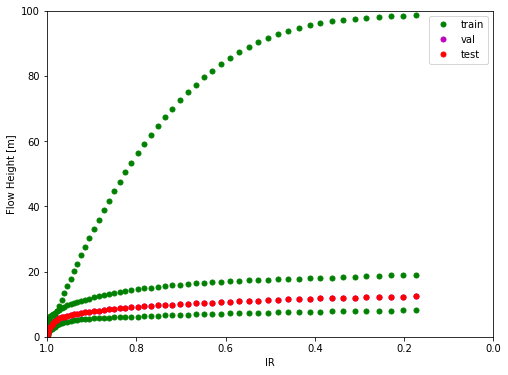

In [46]:
def plot_curve3(trg, valg, teg):
    plt.plot(trg['IR'], trg['FlowHt'], 'go', label='train', markersize=5, zorder=1)
    plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='val',  markersize=5, zorder=1)
    plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='test',  markersize=5, zorder=1)
    plt.xlabel('IR')
    plt.ylabel('Flow Height [m]')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    plt.xlim(0, 1)
    plt.ylim(0, 100)
    plt.legend(loc='best')
    plt.gca().invert_xaxis()


n = len(df)*0.5
crv_tr0 = df[0:int(n*0.50)].copy()
crv_tr1 = df[int(n*0.75):int(n)].copy()
crv_tr = pd.concat([crv_tr0, crv_tr1])
crv_va = df[int(n*0.50):int(n*0.75)].copy()

plot_curve3(crv_tr, crv_va, crv_va )

In [47]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []

va_mae_con = []
train_loss = []
val_loss = []
train_mae = []
val_mae = []

window = wide_window
window_t = wide_window_t
model = lstm_model

npat = 50
n_batch = 30

window.train_df = crv_tr
window.val_df = crv_va

Text(0.5, 1.0, 'train')

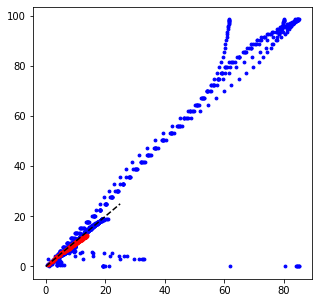

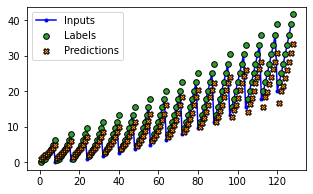

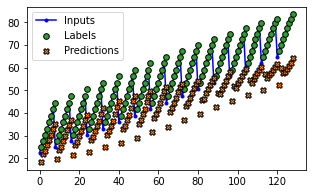

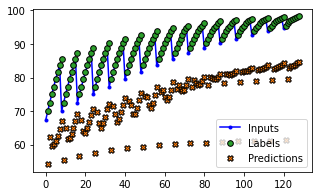

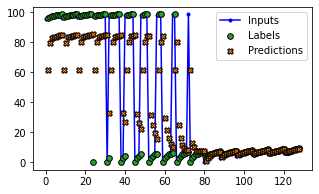

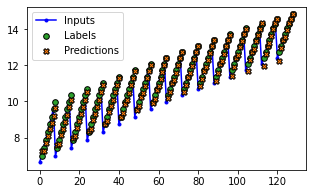

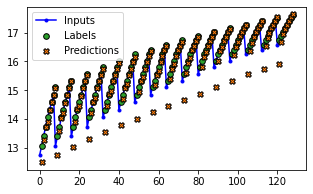

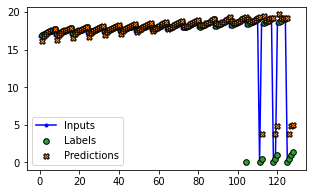

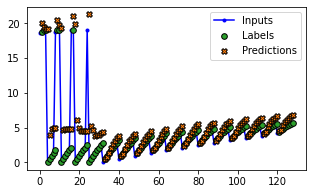

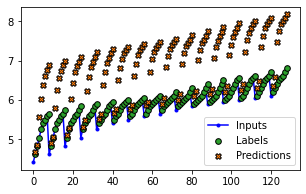

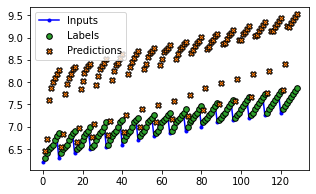

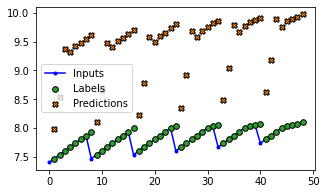

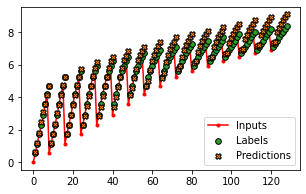

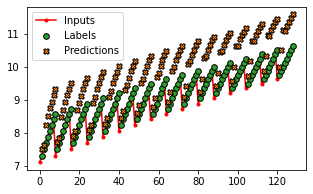

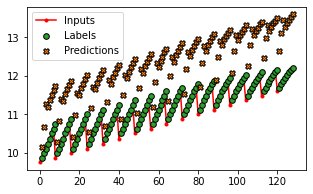

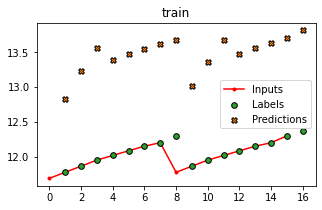

In [51]:

window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig, ax3 = plt.subplots(figsize =(5,5))




markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig, ax5 = plt.subplots(figsize =(5,3))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, 0],
                        marker='.',color=colors[j], s=32)

            #if i == 0:
            ax5.legend()

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 25], [0, 25], 'k--') # dashed diagonal
#ax5.invert_xaxis()


subplot_title = ('train')
plt.gca().set_title(subplot_title)




### Predict Any Curve
- bases on Convolution model

#### read data

In [57]:
df3 = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") )

df3 = df3[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df3['delIF'] = df3['delFlow']/df3['delIR']*-1

df3['delIF']=df3['delIF'].replace(np.nan, 0)
df3 = df3[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df3.head())

,IR,FlowHt,Sand,Ash,delIR
0,1.0000,0,0.4,0.6,0.0000
1,0.9995,1,0.4,0.6,-0.0005
2,0.9985,1,0.4,0.6,-0.0010
3,0.9970,1,0.4,0.6,-0.0015
4,0.9950,1,0.4,0.6,-0.0020


,IR,FlowHt,Sand,Ash,delIR
count,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02,2.320000e+02
mean,-4.287758e-16,2.220446e-16,2.679849e-17,-2.679849e-17,3.062684e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.174275e+00,-7.533546e+00,-1.369029e+00,-1.369029e+00,-1.698768e+00
25%,-7.672155e-01,1.321675e-01,-5.989500e-01,-5.989500e-01,-8.642854e-01
50%,2.786256e-01,1.321675e-01,0.000000e+00,0.000000e+00,1.040834e-16
75%,9.065283e-01,1.321675e-01,5.989500e-01,5.989500e-01,8.642854e-01
max,1.115497e+00,1.321675e-01,1.369029e+00,1.369029e+00,1.698768e+00


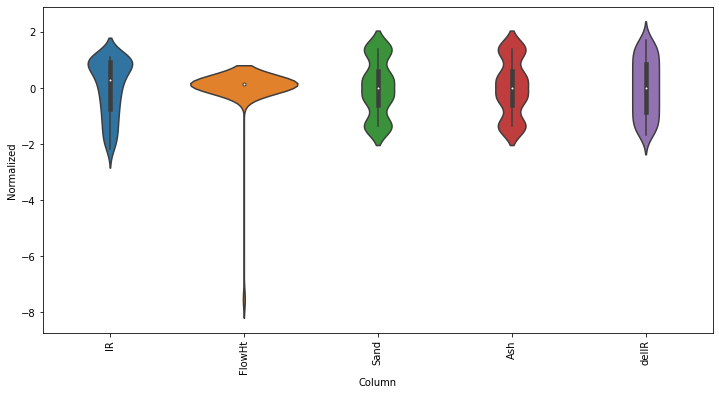

In [58]:
df3_mean = df3.mean()
df3_std = df3.std()
df3_std_s = (df3 - df3_mean) / df3_std
df3_std_m = df3_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df3_std_m)
_ = ax.set_xticklabels(df3.keys(), rotation=90)
df3_std_s.describe()

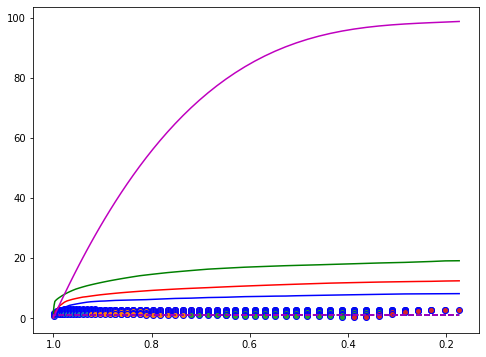

In [59]:
df3_org = df3

n = len(df3)
c_0 = df3[0:int(n*0.25)].copy()
c_1 = df3[int(n*0.25):int(n*0.5)].copy()
c_2 = df3[int(n*0.5):int(n*0.75)].copy()
c_3 = df3[int(n*0.75):int(n)].copy()

wide_window_t.train_df = c_0
dataset = wide_window_t.train

fig, ax2 = plt.subplots()

for i, batch in enumerate(dataset) :
    inputs, targets, lab = batch
    predictions = lstm_model(inputs)
    ax2.scatter(lab[:,:,0], predictions[:,:,0], marker='o', edgecolor ='b')
#ax2.set_xlim([1.2, -2.5])

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
        curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)

ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)

ax2.invert_xaxis()

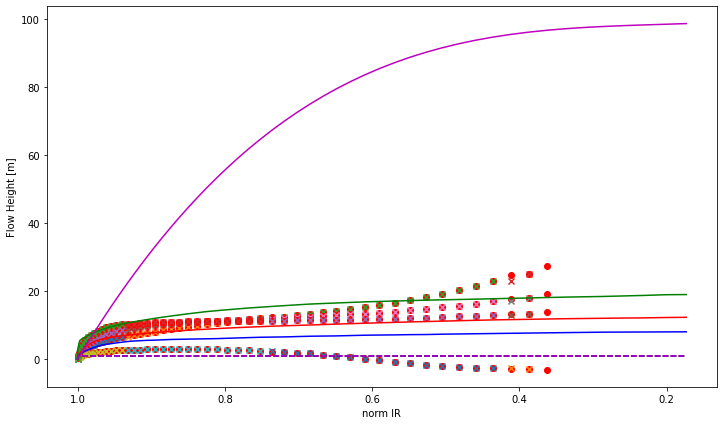

In [65]:
fig, ax2 = plt.subplots(figsize = (12,7))

train_df_3 = curve_3.copy()
train_df_2 = curve_2.copy()
train_df_1 = curve_1.copy()
train_df_0 = curve_0.copy()
#plots_t.plot_all(train_df_0, set_name='0', marker2='o' ,model=conv_model,window_t=conv_window_t, edgecolor2 ='g')
#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 8
label_width = 8
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]
train_df_40 = c_0
train_df_41 = c_1
train_df_42 = c_2
train_df_43 = c_3

data_set = [train_df_40, train_df_41, train_df_42, train_df_43  ]
#data_set = [train_df_41, train_df_42, train_df_43  ]
#data_set = [train_df_43]

for data in data_set :

    wide_window_t.train_df = data
    ds = wide_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        if i>0 :
            inputs[0,:,1] = inputs_res[-1:,:,1]
        for n in range (len(inputs)-1) :
            predictions = lstm_model(inputs[n:n+1])
            predictions = predictions.numpy()

            inputs[n+1, :, 1] = predictions[0, :, 0]
            inputs_res = inputs


        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs

        predictions = tf.convert_to_tensor(predictions, dtype=tf.float32)
        predictions = lstm_model(inputs)
#        ax2.scatter(lab[:,:, 0],  predictions[:, :, 0],marker='o', edgecolors=None, label='Predictions'
#             ,facecolors='red'  )# , c='#ff7f0e', s=64)
#        ax2.scatter(inputs[:, :, 0], inputs[:, :, 1],label='Inputs', marker='x')
        ax2.scatter(lab[:,0, 0],  predictions[:, 0, 0],marker='o', edgecolors=None, label='Predictions'
             ,facecolors='red'  )# , c='#ff7f0e', s=64)
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='x')


ax2.invert_xaxis()



